### **直线检测（1）**

霍夫变换算法检测图像中的直线主要有4个步骤：
1. 将参数空间的坐标轴离散化
2. 通过映射关系求取图像中的每个非零参数在参数空间中通过的方格
3. 统计参数空间内每个方格出现的次数，选取次数大于某一阈值的方格作为表示直线的方格
4. 将参数空间中表示直线的方格的参数作为图像中直线的参数

cv.HoughLines()是标准霍夫变换和多尺度霍夫变换函数，无法准确知道图像中直线或线段的长度，只能得到图像中是否存在符合要求的直线及直线的极坐标解析式，如果需要准确地定位图像中线段的位置，需要使用cv.HoughLinesP()函数

In [38]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [39]:
cv.HoughLines?

Docstring:
HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]) -> lines
.   @brief Finds lines in a binary image using the standard Hough transform.
.   
.   The function implements the standard or standard multi-scale Hough transform algorithm for line
.   detection. See <http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm> for a good explanation of Hough
.   transform.
.   
.   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
.   @param lines Output vector of lines. Each line is represented by a 2 or 3 element vector
.   \f$(\rho, \theta)\f$ or \f$(\rho, \theta, \textrm{votes})\f$ . \f$\rho\f$ is the distance from the coordinate origin \f$(0,0)\f$ (top-left corner of
.   the image). \f$\theta\f$ is the line rotation angle in radians (
.   \f$0 \sim \textrm{vertical line}, \pi/2 \sim \textrm{horizontal line}\f$ ).
.   \f$\textrm{votes}\f$ is the value of accumulator.
.   @param rho Distance resolutio

In [40]:
def draw_line(img, lines):
    img_copy = img.copy()
    for i in range(0, len(lines)):
        # cv.HoughLines()以极坐标的形式将图像中直线的参数返回
        # 获取直线的长度和极角
        rho, theta = lines[i][0][0], lines[i][0][1]
        # 根据参数方程沿x轴和y轴投影，单位向量
        a = np.cos(theta)
        b = np.sin(theta)
        # 将直线沿x轴和y轴分解投影
        x0 = a * rho
        y0 = b * rho
        # 获取直线的起点和终点
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        # 绘制白色的直线
        cv.line(img_copy, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return img_copy

In [41]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'HoughLines.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read HoughLines.jpg')
    sys.exit

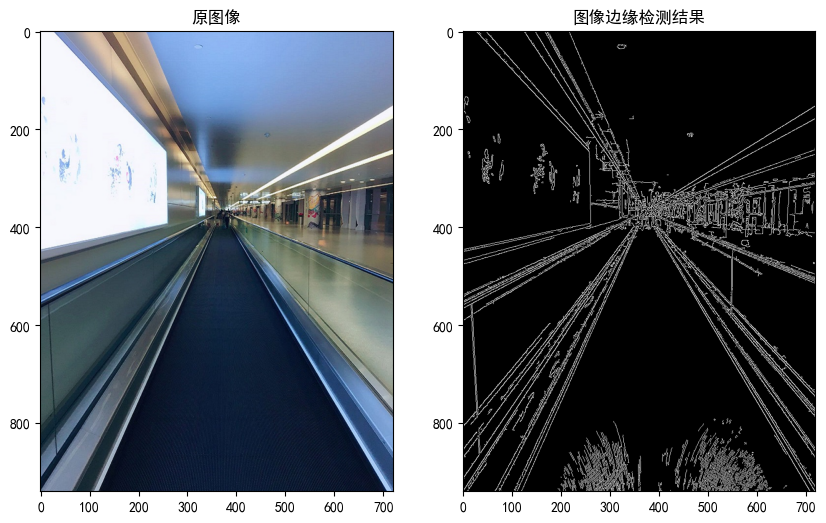

In [42]:
# 检测图像边缘
# cv.HoughLines()第一个参数必须是单通道二值图像，如果要检测彩色图像或灰度图像，可以将边缘检测后的图像作为输入
image_edge = cv.Canny(img, 50, 150, 3)
# 展示结果
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('原图像')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('图像边缘检测结果')
plt.imshow(image_edge, cmap='gray')

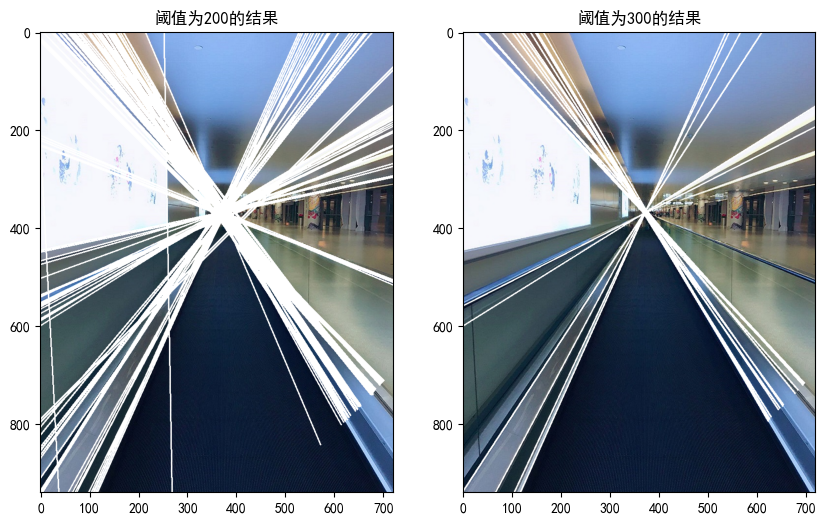

In [43]:
# 分别设定不同累加器阈值进行直线检测，并显示结果
threshold_1 = 200
# 第二个参数是参数空间中坐标轴进行离散化的单位长度，单位为像素，一般设置为1
# 第三个参数是参数空间中坐标轴进行离散化的单位角度，单位为弧度，一般设置为np.pi/180
# 以上两个参数的数值越小，精度越高
# 第四个参数是累加器的阈值，阈值较小，能检测较短的直线；阈值较大，只能检测出图像中较长的直线
lines_1 = cv.HoughLines(image_edge, 1, np.pi / 180, threshold_1)
# srn和stn是起到选择标准霍夫变换还是多尺度霍夫变换的作用，标准情况两个全为0
try:
    img1 = draw_line(img, lines_1)
except:
    print('累加器阈值设为{}时，不能检测出直线'.format(threshold_1))
threshold_2 = 300
lines_2 = cv.HoughLines(image_edge, 1, np.pi / 180, threshold_2)
try:
    img2 = draw_line(img, lines_2)
except:
    print('累加器阈值设为{}时，不能检测出直线'.format(threshold_2))
# 展示结果
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('阈值为200的结果')
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title('阈值为300的结果')
plt.imshow(img2)